In [8]:
import numpy as np
import scipy.integrate as spyint
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


/tmp/ipykernel_32790/2117955736.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.integrate as spyint


In [29]:
def solveFHN(prm, dt = 'auto'):
    def core(t, y):
        u,v = y[0], y[1]
        dudt = u*(1-u)*(u-prm['a']) - v
        dvdt = prm['e']*(prm['k']*u-v-prm['b'])
        return [dudt, dvdt]
    if dt == 'auto':
        sol = spyint.solve_ivp(core, (0,prm['tmax']), prm['y0'], method='RK45')
    else: 
        time = np.linspace(0, prm['tmax'], prm['tn'])
        sol = spyint.solve_ivp(core, (0,prm['tmax']), prm['y0'], method='RK45', t_eval=time)
    return sol.y, sol.t


def FHNString(prm, dt='auto'):
    # Setting the diffusion:
    
    def core(t, y):
        u = y[:prm['N']]; v = y[prm['N']:]
        dudt = u*(1-u)*(u-prm['a']) - v 
        
        dvdt0 =  prm['D']*(v[1]-v[0]); dvdtn = prm['D']*(v[-2]-v[-1])
        coupling = v[0:-2] + v[2:] - 2*v[1:-1]
        dvdti = prm['e'] *(prm['k']*u[1:-1]  - v[1:-1] -prm['b']) +prm['D']*coupling
        
        # dvdt = np.concatenate([np.array(dvdt0), dvdti, np.array(dvdtn)])
        dvdt = np.hstack(([dvdt0], dvdti, [dvdtn]))
        return np.concatenate([dudt,dvdt])
    if dt == 'auto':
        sol = spyint.solve_ivp(core, (0,prm['tmax']), prm['y0'], method='Radau')
    else: 
        time = np.linspace(0, prm['tmax'], prm['tn'])
        sol = spyint.solve_ivp(core, (0,prm['tmax']), prm['y0'], method='RK45', t_eval=time)
    return sol.y, sol.t

def solve_plot(prm, dt='auto', trans=0):
    ysol, t = FHNString(prm, dt)

    plt.figure(figsize=(10, 3))
    plt.imshow(
        ysol[:prm['N']], 
        cmap='inferno', 
        aspect='auto', 
        interpolation='nearest',
        extent=[t[0], t[-1], 0, prm['N']-1]  
    )
    cbar = plt.colorbar()   
    cbar.set_label('$u$')
    plt.ylabel('String')
    plt.xlabel('Time')
    plt.title(prm['pattern'])
    return ysol, t


def split_integration(prm, diffusion, tmax2):
    sol0, t0 = solve_plot(prm)
    prm['D'] = diffusion; prm['y0'] = sol0[:,-1]
    prm['tmax'] = tmax2
    sol1, t1 = solve_plot(prm)
    return sol1, t1

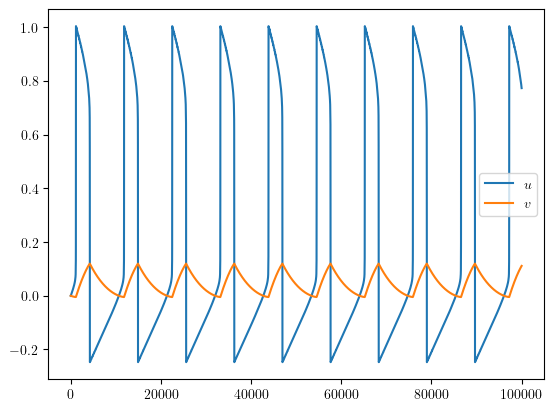

In [ ]:
OneOscillator = {
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : .064, 
    'tmax' : 1e5, 
    'y0': [0,0],
}
y, t = solveFHN(OneOscillator, dt='auto')
plt.plot(t, y[0,:], label='$u$')
plt.plot(t, y[1,:], label='$v$')
plt.legend()

# Synchronised Oscillations

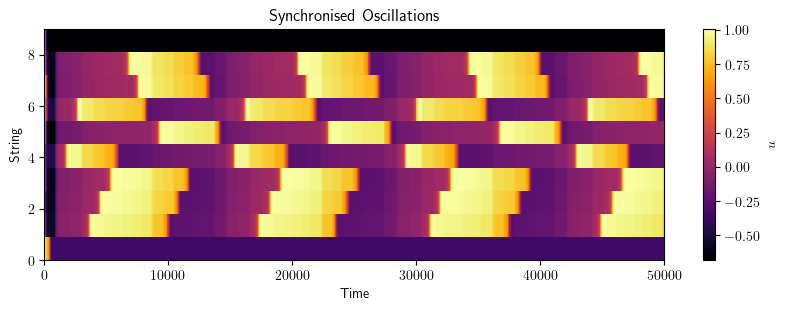

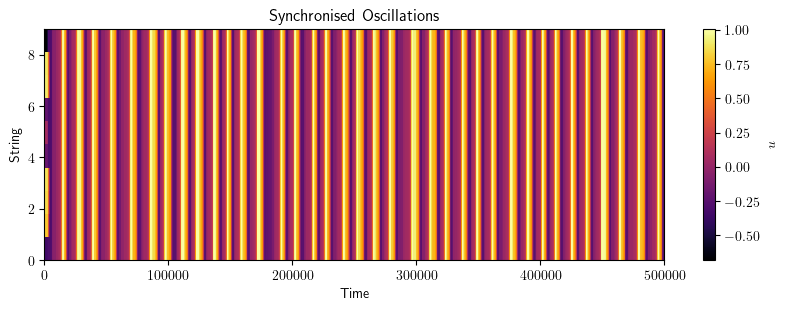

In [5]:
SO_N = {
    'pattern': 'Synchronised Oscillations',
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : .064, 
    'D' : 0, 
    'tmax' : 50000, 
    'y0': np.random.uniform(0, 1, 20)
}

ySO,tSO = split_integration(SO_N, 1.05e3, 5e5)

# Anti-Phase Sync


Single FHN oscillator for the same parameter value;

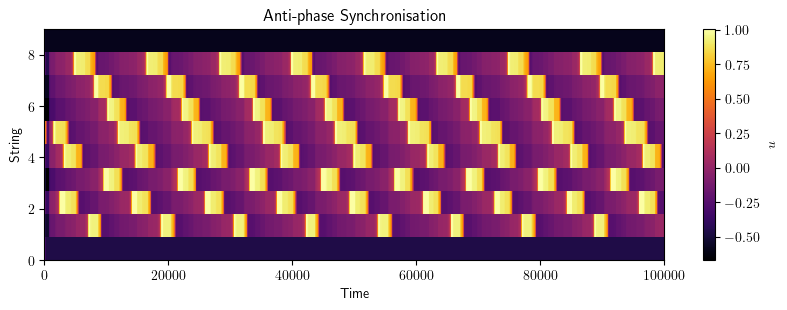

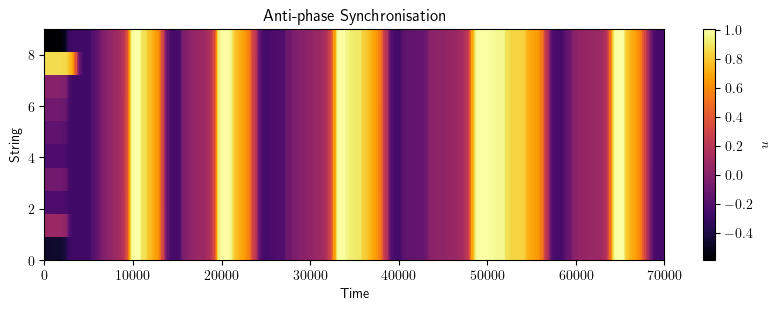

In [3]:
# np.random.seed(42)   
APS_N = {
    'pattern': 'Anti-phase Synchronisation',
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : .064, 
    'D' : 0, 
    'tmax' : 1e5, 
    'y0': np.random.uniform(0,1,20)
}
yAPS, tAPS = split_integration(APS_N, .4e3, 7e4)


# Spatially patterned oscillator death

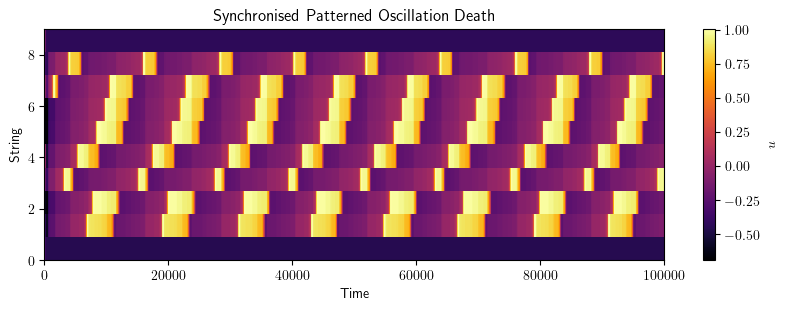

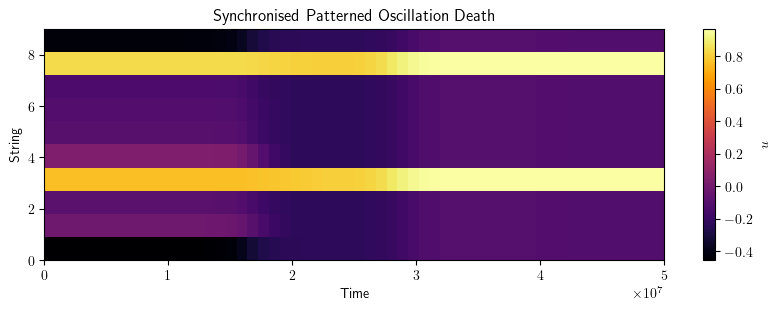

In [4]:
np.random.seed(50)   
SPOD_N = {
    'pattern': 'Synchronised Patterned Oscillation Death',
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : 0.064, #.064, 
    'D' : 0, 
    'tmax' : 1e5, 
    'y0': np.random.uniform(0, 1, 20)
}
ySPOD,tSPOD = split_integration(SPOD_N, 1.9e3, 5e7)

# Chimera State

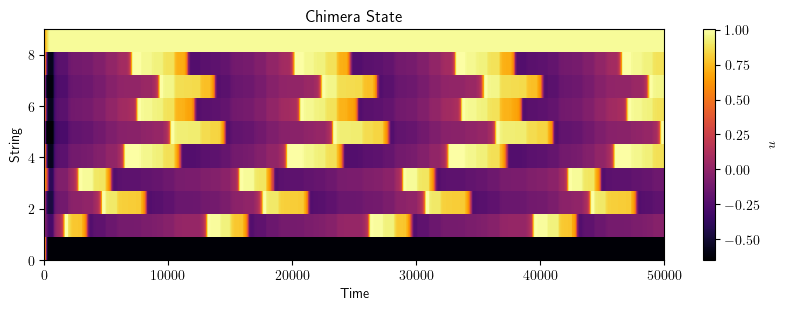

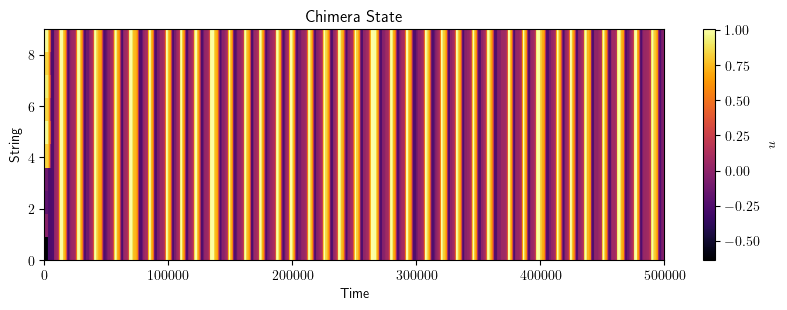

In [18]:
SO_N = {
    'pattern': 'Chimera State',
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : .064, 
    'D' : 0, 
    'tmax' : 5e4, 
    'y0': np.random.uniform(0, 1, 20)
}
yCS,tCS = split_integration(SO_N, 1.4e3, 5e5)

# Split integration
The parameter combination, `SPOD` resulted in sustained oscillations. Thus we are using initial conditions from that to trigger diffusion. 


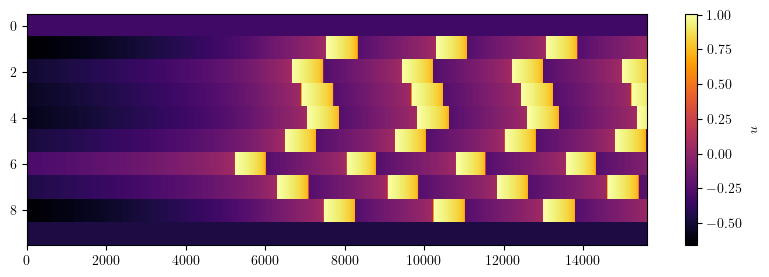

In [ ]:
SPOD_1 = {
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : 0.6e-1, 
    'D': 0,
    # 'D' : 1.8e3, 
    'tmax' : 50000, 
    'tn' : 10,
    'y0': np.random.uniform(.1,1,20),
}

# sol0, t0 =FHNString(SPOD_1)
sol0, t0 = solve_plot(SPOD_1)


In [ ]:

SPOD_1['D'] = 1800
SPOD_1['y0'] = sol0[:, -1 ]
SPOD_1['tmax'] = 300000
sol1, t1 = solve_plot(SPOD_1)

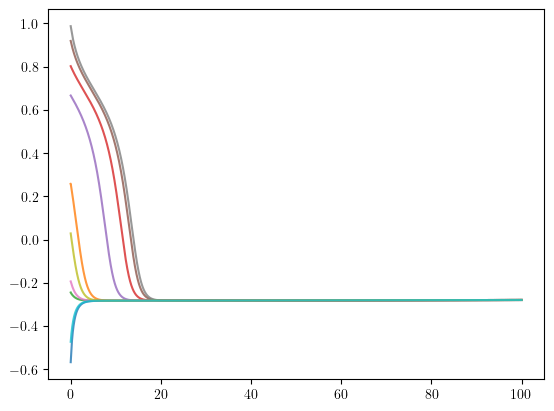

In [ ]:
s